In [2]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cls
def plot_class_regions_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):
    import matplotlib.colors as cls
    import matplotlib.patches as mpatches
    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = cls.ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = cls.ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)

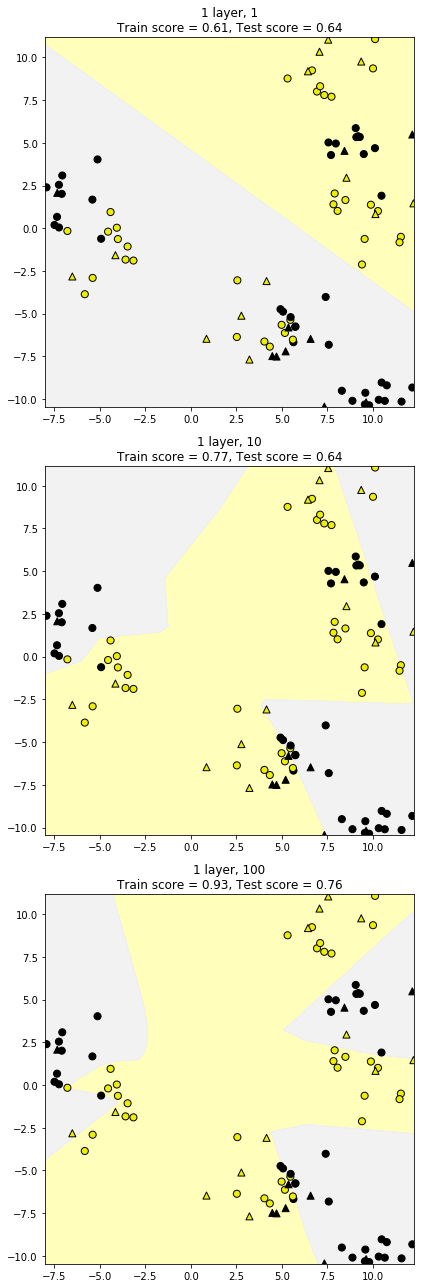

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
X_D2,y_D2 = make_blobs(n_features=2, n_samples=100, centers=8,cluster_std=1.3,random_state=4)
y_D2 = y_D2 %2
X_train,X_test,y_train,y_test = train_test_split(X_D2,y_D2,random_state=0)
fig,subaxes = plt.subplots(3,1,figsize=(6,18))
for units,axis in zip([1,10,100],subaxes):
    nnclf = MLPClassifier(hidden_layer_sizes=[units],solver='lbfgs',random_state=0).fit(X_train,y_train)
    # 1. 设置random_state=0. This is because for neural networks, their weights are initialized randomly, which can affect the model that is learned. 
    # Because of this, even without changing the key parameters on the same data set. The same neural network algorithm might 
    # learn two different models. Depending on the value of the internal random seed that is chosen. So by always setting the same 
    # value for the random seed used to initialize the weights. We can assure the results will always be the same, for everyone using these examples.
    # 2. hidden_layer_sizes. This parameter is a list, with one element for each hidden layer, that gives the number of hidden units to use for that layer. 
    # So here we're passing a list with a single element. Meaning we want one hidden layer, using the number in the variable called units. By default, 
    # if you don't specify the hidden_layer_sizes parameter, scikit-learn will create a single hidden layer with 100 hidden units. 
    # 3. The default solver, adam, tends to be both efficient and effective on large data sets, with thousands of training examples. For small data sets, 
    # like many of the ones we use in these examples, the lbfgs solver tends to be faster, and find more effective weights. 
    title = '1 layer, {}'.format(units)
    plot_class_regions_for_classifier_subplot(nnclf,X_train,y_train,X_test,y_test,title,axis)
plt.tight_layout()
plt.show()

## two hiden layer

In [5]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1 ## 2
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = cls.ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = cls.ListedColormap(color_list_bold[0:numClasses])

    h = 0.03 # 间隔 
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

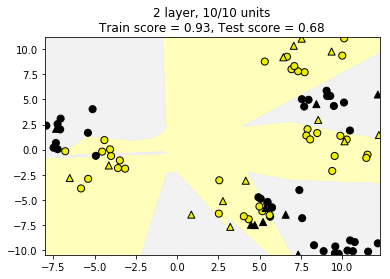

In [6]:
nnclf = MLPClassifier(hidden_layer_sizes=[10,10],solver='lbfgs',random_state=0).fit(X_train,y_train)
plot_class_regions_for_classifier(nnclf,X_train,y_train,X_test,y_test,'2 layer, 10/10 units')

## regularization parameter:alpha 

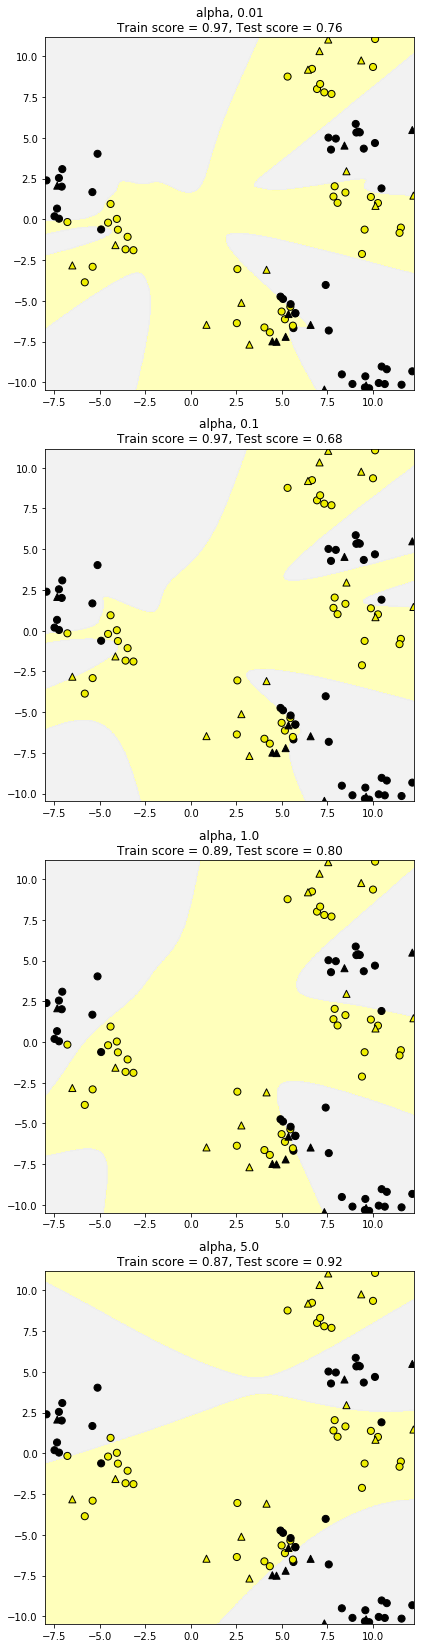

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_D2,y_D2,random_state=0)
fig,subaxes = plt.subplots(4,1,figsize=(6,23))
for this_alpha,axis in zip([0.01,0.1,1.0,5.0],subaxes):
    nnclf = MLPClassifier(solver='lbfgs',activation='tanh',alpha=this_alpha,hidden_layer_sizes=[100,100],random_state=0).fit(X_train,y_train)
    # alpha: float, default=0.0001
    # activation: {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
    plot_class_regions_for_classifier_subplot(nnclf,X_train,y_train,X_test,y_test,title,axis)
plt.tight_layout()
plt.show()

## realword dataset

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cls
cancer = load_breast_cancer()
(X_cancer,y_cancer) = load_breast_cancer(return_X_y=True)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_cancer,y_cancer,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = MLPClassifier(solver='lbfgs',alpha=5.0,hidden_layer_sizes=[100,100],random_state=0).fit(X_train_scaled,y_train)
print('Accuracy of train dataset is: {:.2f}'.format(clf.score(X_train_scaled,y_train)))
print('Accuracy of test dataset is: {:.2f}'.format(clf.score(X_test_scaled,y_test)))

Accuracy of train dataset is: 0.98
Accuracy of test dataset is: 0.97


## MLPRegressor

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression
plt.figure()
X_R1,y_R1 = make_regression(n_samples=100,n_features=1,n_informative=1,bias=150,noise=30,random_state=0 )

<Figure size 432x288 with 0 Axes>

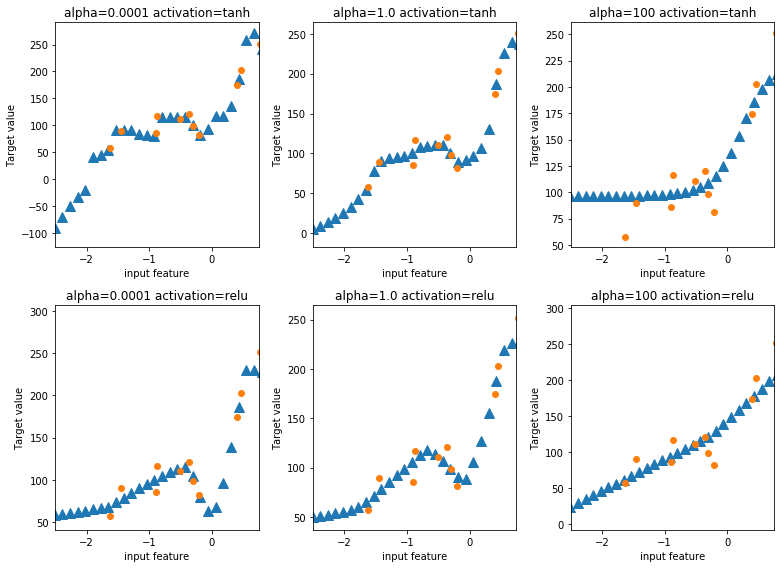

In [15]:
from sklearn.neural_network import MLPRegressor
fig,subaxes = plt.subplots(2,3,figsize=(11,8))
X_predict_input = np.linspace(-3,3,50).reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X_R1[0::5],y_R1[0::5],random_state=0)
for thisaxisrow,thisactivation in zip(subaxes,['tanh','relu']):
    for thisalpha,thisaxis in zip([0.0001,1.0,100],thisaxisrow):
        mlpreg = MLPRegressor(hidden_layer_sizes=[100,100],activation=thisactivation,alpha=thisalpha,solver='lbfgs').fit(X_train,y_train)
        y_predict_output = mlpreg.predict(X_predict_input)
        thisaxis.set_xlim([-2.5,0.75])
        thisaxis.plot(X_predict_input,y_predict_output,'^',markersize=10)
        thisaxis.plot(X_train,y_train,'o')
        thisaxis.set_xlabel('input feature')
        thisaxis.set_ylabel('Target value')
        thisaxis.set_title('alpha={} activation={}'.format(thisalpha,thisactivation))
        plt.tight_layout()
plt.show()
        
    